# Test Cases Comparison

This notebook aim to compare the result with several settings including:

- Variational form depth: 0 (no entanglement), 1 and 2
- Battleship grid size: 2x2, 3x3 and 4x4

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit.aqua.components.optimizers import SPSA
from qiskit.aqua.components.variational_forms import RY
from qiskit import BasicAer
from qiskit.aqua import QuantumInstance

In [2]:
from battleship import Battleship
from vqe import VQEWithHistory
from helpers import printResultSummary, getSolutionFromResult

In [3]:
def runVQEWithMultiVaraitionalformDepth(qubitOps, optimizer, quantum_instance, depthList):
    results = []
    histories = []
    
    for depth in depthList:
        print('Running depth =', depth)
        
        ry = RY(qubitOps.num_qubits, depth=depth, entanglement='linear')
        vqe = VQEWithHistory(qubitOps, ry, optimizer, 'paulis')
        
        result, history = vqe.run(quantum_instance)
        
        results.append(result)
        histories.append(history)
        
    return results, histories

In [4]:
def printResults(labels, results, battleship, shift):
    for i in range(len(labels)):
        print('[', labels[i], ']')
        printResultSummary(results[i], shift)
        battleship.draw(getSolutionFromResult(results[i]))
        print('\n')

In [5]:
def plotEnergyHistories(heading, labels, histories, shift):
    fig, ax = plt.subplots(figsize=(8,6))
  
    for i in range(len(labels)):
        ax.plot(np.arange(0, len(histories[i])), np.array(histories[i]) + shift, label=labels[i])

    ax.set_title(heading, size=20)
    ax.set_ylabel("energy", fontsize=15)
    ax.set_xlabel("timestep", fontsize=15)

    ax.legend(loc='upper right')
    ax.grid()
    
    plt.show()

In [6]:
depthList = [0, 1, 2]
depthLabels = ['Depth = ' + str(depth) for depth in depthList]

In [7]:
seed = 2101
spsa = SPSA(max_trials=300)

## 2x2 Puzzle Size

In [8]:
bs22 = Battleship()
bs22.randomPuzzle(2, 2)
qubitOps22, shift22 = bs22.getQubitOps()

In [9]:
quantum_instance = QuantumInstance(BasicAer.get_backend('qasm_simulator'), seed=seed, seed_transpiler=seed)
results22, histories22 = runVQEWithMultiVaraitionalformDepth(qubitOps22, spsa, quantum_instance, depthList)

Running depth = 0
Running depth = 1
Running depth = 2


In [10]:
printResults(depthLabels, results22, bs22, shift22)

[ Depth = 0 ]
VQE Result
- Running time: 113.76 sec
- Evaluation count: 651
- Final energy: 0.001953125
- Solution: 1101
Simple Battleship
size: 2 x 2 

| x |   | 1
| x | x | 2
  2   1   


[ Depth = 1 ]
VQE Result
- Running time: 114.77 sec
- Evaluation count: 651
- Final energy: 0.001953125
- Solution: 1101
Simple Battleship
size: 2 x 2 

| x |   | 1
| x | x | 2
  2   1   


[ Depth = 2 ]
VQE Result
- Running time: 116.70 sec
- Evaluation count: 651
- Final energy: 0.001953125
- Solution: 1101
Simple Battleship
size: 2 x 2 

| x |   | 1
| x | x | 2
  2   1   




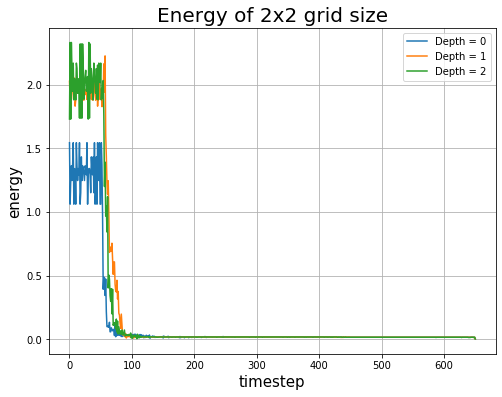

In [78]:
plotEnergyHistories('Energy of 2x2 grid size', depthLabels, histories22, shift22)

## 3x3 Puzzle Size

In [14]:
bs33 = Battleship()
bs33.randomPuzzle(3, 3)
qubitOps33, shift33 = bs33.getQubitOps()
bs33.draw()

Simple Battleship
size: 3 x 3 

|   |   |   | 1
|   |   |   | 3
|   |   |   | 1
  3   1   1   


In [19]:
quantum_instance = QuantumInstance(BasicAer.get_backend('qasm_simulator'), seed=seed, seed_transpiler=seed)
results33, histories33 = runVQEWithMultiVaraitionalformDepth(qubitOps33, spsa, quantum_instance, depthList)

Running depth = 0
Running depth = 1
Running depth = 2


In [20]:
printResults(depthLabels, results33, bs33, shift33)

[ Depth = 0 ]
VQE Result
- Running time: 273.95 sec
- Evaluation count: 651
- Final energy: 0.068359375
- Solution: 001111001
Simple Battleship
size: 3 x 3 

| x |   |   | 1
| x | x | x | 3
| x |   |   | 1
  3   1   1   


[ Depth = 1 ]
VQE Result
- Running time: 277.23 sec
- Evaluation count: 651
- Final energy: 2.4453125
- Solution: 001111100
Simple Battleship
size: 3 x 3 

|   |   | x | 1
| x | x | x | 3
| x |   |   | 1
  3   1   1   


[ Depth = 2 ]
VQE Result
- Running time: 290.17 sec
- Evaluation count: 651
- Final energy: 7.40234375
- Solution: 101001001
Simple Battleship
size: 3 x 3 

| x |   |   | 1
| x |   |   | 3
| x |   | x | 1
  3   1   1   




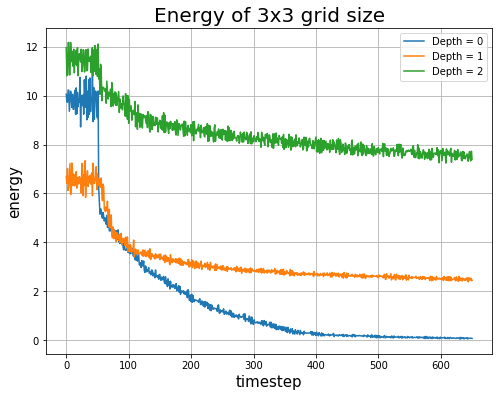

In [79]:
plotEnergyHistories('Energy of 3x3 grid size', depthLabels, histories33, shift33)

## 4x4 Puzzle Size

In [22]:
bs44 = Battleship()
bs44.randomPuzzle(4, 4)
qubitOps44, shift44 = bs44.getQubitOps()
bs44.draw()

Simple Battleship
size: 4 x 4 

|   |   |   |   | 2
|   |   |   |   | 3
|   |   |   |   | 0
|   |   |   |   | 1
  1   2   1   2   


In [23]:
quantum_instance = QuantumInstance(BasicAer.get_backend('qasm_simulator'), seed=seed, seed_transpiler=seed)
results44, histories44 = runVQEWithMultiVaraitionalformDepth(qubitOps44, spsa, quantum_instance, depthList)

Running depth = 0
Running depth = 1
Running depth = 2


In [24]:
printResults(depthLabels, results44, bs44, shift44)

[ Depth = 0 ]
VQE Result
- Running time: 1791.84 sec
- Evaluation count: 651
- Final energy: 10.060546875
- Solution: 1010000111011100
Simple Battleship
size: 4 x 4 

|   |   | x | x | 2
| x |   | x | x | 3
| x |   |   |   | 0
|   | x |   | x | 1
  1   2   1   2   


[ Depth = 1 ]
VQE Result
- Running time: 1879.84 sec
- Evaluation count: 651
- Final energy: 16.138671875
- Solution: 0011011101101100
Simple Battleship
size: 4 x 4 

|   |   | x | x | 2
|   | x | x |   | 3
| x | x | x |   | 0
| x | x |   |   | 1
  1   2   1   2   


[ Depth = 2 ]
VQE Result
- Running time: 1912.50 sec
- Evaluation count: 651
- Final energy: 16.73828125
- Solution: 1010110001100111
Simple Battleship
size: 4 x 4 

| x | x | x |   | 2
|   | x | x |   | 3
|   |   | x | x | 0
|   | x |   | x | 1
  1   2   1   2   




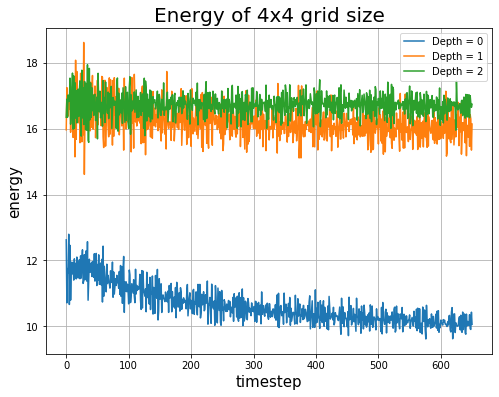

In [80]:
plotEnergyHistories('Energy of 4x4 grid size', depthLabels, histories44, shift44)

## Problem Size Comparison

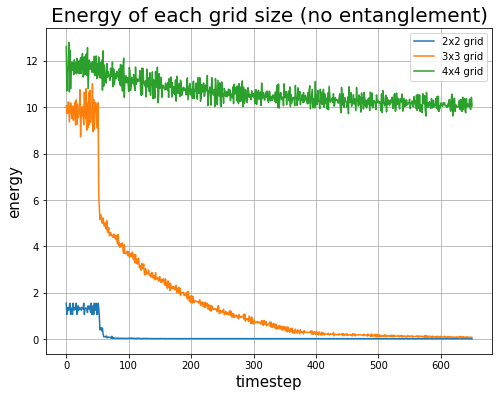

In [81]:
noEntangleEnergy = [
    np.array(histories22[0])+shift22,
    np.array(histories33[0])+shift33,
    np.array(histories44[0])+shift44]

plotEnergyHistories(
    "Energy of each grid size (no entanglement)",
    ["2x2 grid", "3x3 grid", "4x4 grid"],
    noEntangleEnergy,
    0)

In [54]:
gridSizes = [4, 9, 16]
runtimes = [results22[0]['eval_time'], results33[0]['eval_time'], results44[0]['eval_time']]
numberOfPaulis = [len(qubitOps22.get_flat_pauli_list()), len(qubitOps33.get_flat_pauli_list()), len(qubitOps44.get_flat_pauli_list())]

print(numberOfPaulis)
print(runtimes)

[8, 27, 64]
[113.75584602355957, 273.9450333118439, 1791.840048789978]


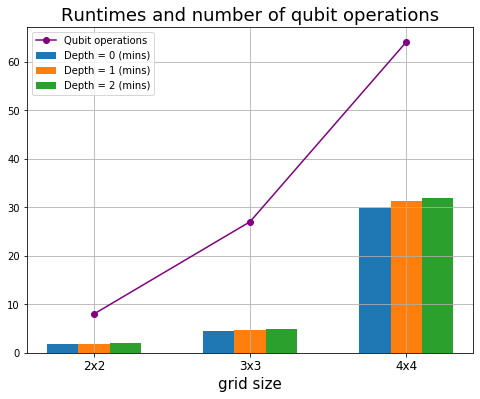

In [91]:
runtimes1 = [results22[1]['eval_time'], results33[1]['eval_time'], results44[1]['eval_time']]
runtimes2 = [results22[2]['eval_time'], results33[2]['eval_time'], results44[2]['eval_time']]

labels = ["2x2", "3x3", "4x4"]
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize=(8,6))

ax.bar(x - width, np.array(runtimes)/60, width, label='Depth = 0 (mins)')
ax.bar(x, np.array(runtimes1)/60, width, label='Depth = 1 (mins)')
ax.bar(x + width, np.array(runtimes2)/60, width, label='Depth = 2 (mins)')

ax.plot(labels, numberOfOperations, marker="o", color="purple", label="Qubit operations")

ax.set_title("Runtimes and number of qubit operations", size=18)
ax.set_xlabel("grid size", fontsize=15)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize="12")

ax.legend(loc='upper left')
ax.grid()

plt.show()